In [6]:
import numpy as np

In [8]:
data = open('../data/DATA_genus_network.txt', 'rU').read()

In [9]:
datarr = np.array([i.split('\t') for i in data.split('\n')[:-1]])

In [10]:
datarr[0]

array(['Degree', 'Treatment', 'Degree_norm', 'Closeness', 'Betweeness',
       'genus', 'phyla'], 
      dtype='|S29')

In [11]:
datarr2 = [i[0]+','+i[1] for i in datarr ]
datarr2j = ','.join([i+'\n' for i in datarr2]).replace('\n,','\n')
z = open('../data/degree.csv', 'w')
z.write(datarr2j)
z.close()

In [179]:
import matplotlib
%matplotlib inline
%load_ext rpy2.ipython
import matplotlib.pyplot as plt

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [13]:
%%R
d <- read.csv('../data/degree.csv', header=T)
d6wk <- subset(d, Treatment =='YI')
dymt <- subset(d, Treatment =='YM')
dsmt <- subset(d, Treatment =='SM')
dabx <- subset(d, Treatment =='ABX')
d16wk <- subset(d, Treatment =='WT')

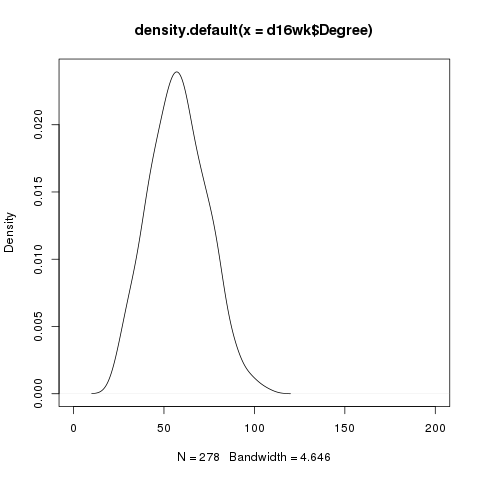

In [14]:
%%R
dp_6wk <- density(d6wk$Degree)
#plot(dp_6wk)
dp_ymt <- density(dymt$Degree)
#plot(dp_ymt, xlim=c(0,200))
dp_16wk <- density(d16wk$Degree)
plot(dp_16wk, xlim=c(0,200))

This is a possible way to go. However, there are nice graphic packages for python too.  
For instance, [Vincent](https://github.com/wrobstory/vincent/blob/master/README.md) is quite good.  
However, for now, Vincent does not install, so I will go with regular matplotlib

In [86]:
wk6 = [i for i in datarr[1:] if i[1] == 'YI']
wk16 = [i for i in datarr[1:] if i[1] == 'WT']
ymt = [i for i in datarr[1:] if i[1] == 'YM']
abx = [i for i in datarr[1:] if i[1] == 'ABX']
smt = [i for i in datarr[1:] if i[1] == 'SM']

In [87]:
from pylab import *
from scipy import *
import pylab as P

(0, 0.05)

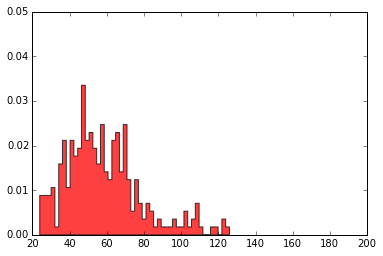

In [88]:
n, bins, patches = plt.hist([int(i[0]) for i in wk6], 50, normed=1, facecolor='r', alpha=0.75, histtype='stepfilled') 
plt.xlim(20,200)
plt.ylim(0,0.05)

(0, 0.05)

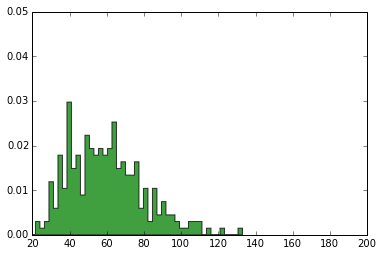

In [89]:
n, bins, patches = plt.hist([int(i[0]) for i in ymt], 50, normed=1, facecolor='g', alpha=0.75, histtype='stepfilled') 
plt.xlim(20,200)
plt.ylim(0,0.05)

(0, 0.05)

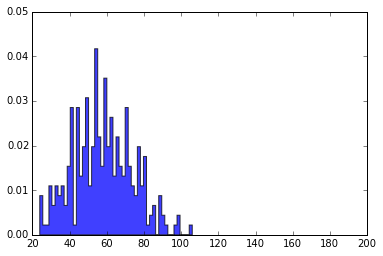

In [90]:
n, bins, patches = plt.hist([int(i[0]) for i in wk16], 50, normed=1, facecolor='b', alpha=0.75, histtype='stepfilled') 
plt.xlim(20,200)
plt.ylim(0,0.05)

(0, 0.05)

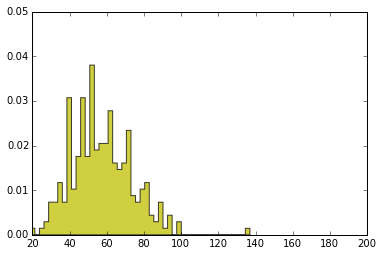

In [91]:
n, bins, patches = plt.hist([int(i[0]) for i in abx], 50, normed=1, facecolor='y', alpha=0.75, histtype='stepfilled') 
plt.xlim(20,200)
plt.ylim(0,0.05)

(0, 0.05)

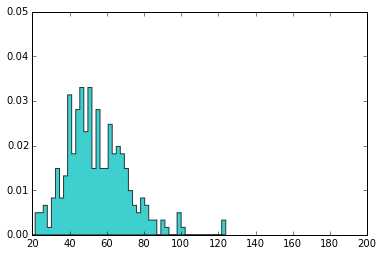

In [92]:
n, bins, patches = plt.hist([int(i[0]) for i in smt], 50, normed=1, facecolor='c',  alpha=0.75, histtype='stepfilled') 
plt.xlim(20,200)
plt.ylim(0,0.05)

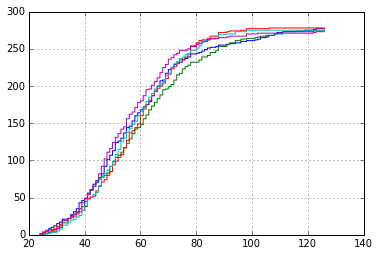

In [93]:
bins = sorted([int(i[0]) for i in wk6]) + [np.inf]

plt.figure()

n, bins, patches = plt.hist([int(i[0]) for i in wk6], normed=False, bins=bins, histtype='step', cumulative=True) 
n, bins, patches = plt.hist([int(i[0]) for i in ymt], normed=False, bins=bins, histtype='step', cumulative=True) 
n, bins, patches = plt.hist([int(i[0]) for i in wk16], normed=False, bins=bins, histtype='step', cumulative=True) 
n, bins, patches = plt.hist([int(i[0]) for i in abx], normed=False, bins=bins, histtype='step', cumulative=True) 
n, bins, patches = plt.hist([int(i[0]) for i in smt], normed=False, bins=bins, histtype='step', cumulative=True) 

P.grid(True)

**Below I use the python kernel density estimation ([KDE](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/)) method instead of normal density**

In [94]:
from scipy.stats import gaussian_kde
from scipy.stats.distributions import norm
import sklearn; print "  scikit-learn:", sklearn.__version__
import scipy; print "  scipy:", scipy.__version__
import statsmodels; print "  statsmodels:", statsmodels.__version__
from sklearn.neighbors import KernelDensity
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

  scikit-learn: 0.16.1
  scipy: 0.17.0
  statsmodels: 0.8.0.dev0+81be990


In [95]:
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(np.array([int(i[0]) for i in wk6])[:, None])
print grid.best_params_

{'bandwidth': 1.0}


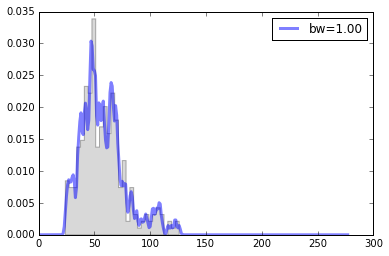

In [96]:
x_grid = np.array(range(len([int(i[0]) for i in wk6])))
x = np.array([int(i[0]) for i in wk6])

kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.legend(loc='upper right')
ax.set_xlim(0, 300);

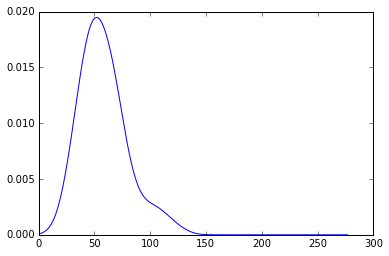

In [97]:
dens_wk6 = gaussian_kde([int(i[0]) for i in wk6])
dens_wk6.covariance_factor = lambda : 0.5
dens_wk6._compute_covariance()
xs = np.array(range(len([int(i[0]) for i in wk6])))
plt.plot(xs,dens_wk6(xs))
plt.show()

In [288]:
import pandas as pd

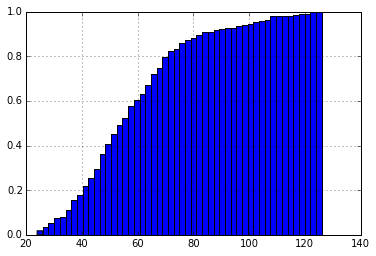

In [99]:
xSer = pd.Series(np.array([int(i[0]) for i in wk6]))
xSer.hist(cumulative=True, normed=1, bins=50)

Now I will try to fit a curve to the sample distribution using [this approach](http://glowingpython.blogspot.de/2012/07/distribution-fitting-with-scipy.html)

In [100]:
from scipy.stats import norm,rayleigh

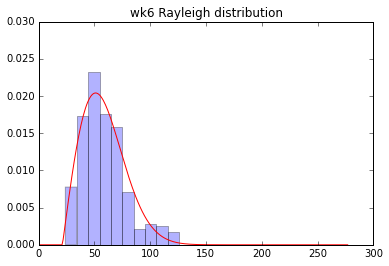

In [128]:
samp_wk6 = np.array([int(i[0]) for i in wk6])
param_wk6 = rayleigh.fit(samp_wk6) # distribution fitting
xs = np.array(range(len([int(i[0]) for i in wk6])))
pdf_fitted_wk6 = rayleigh.pdf(xs,loc=param_wk6[0],scale=param_wk6[1])

title('wk6 Rayleigh distribution')
plot(pdf_fitted_wk6,'r-')
hist(samp_wk6,normed=1,alpha=.3)
ylim((0,0.03))
show()

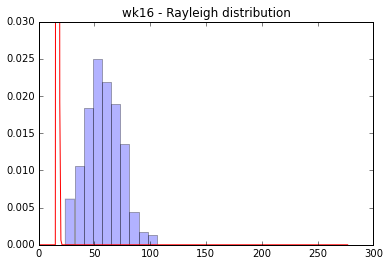

In [161]:
samp_wk16 = np.array([int(i[0]) for i in wk16])
param_wk16 = rayleigh.fit(samp_wk16) # distribution fitting
xs_wk16 = np.array(range(len([int(i[0]) for i in wk16])))
pdf_fitted_wk16 = rayleigh.pdf(xs_wk16,loc=param_wk16[0],scale=param_wk16[1])

title('wk16 - Rayleigh distribution')
plot(pdf_fitted_wk16,'r-')
hist(samp_wk16,normed=1,alpha=.3)
ylim((0,0.03))
show()

In [140]:
param_smt

(4.0999999999999996, 1.0)

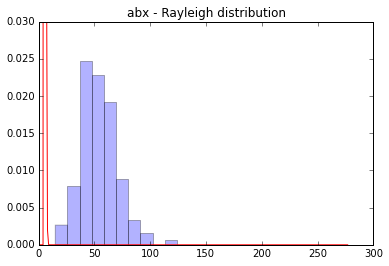

In [126]:
samp_smt = np.array([int(i[0]) for i in smt])
param_smt = rayleigh.fit(samp_smt) # distribution fitting
xs = np.array(range(len([int(i[0]) for i in smt])))
pdf_fitted_smt = rayleigh.pdf(xs,loc=param_smt[0],scale=param_smt[1])

title('abx - Rayleigh distribution')
plot(pdf_fitted_smt,'r-')
hist(samp_smt,normed=1,alpha=.3)
ylim((0,0.03))
show()

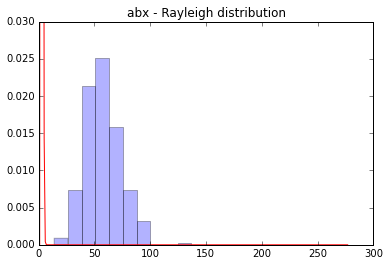

In [127]:
samp_abx = np.array([int(i[0]) for i in abx])
param_abx = rayleigh.fit(samp_abx) # distribution fitting
xs = np.array(range(len([int(i[0]) for i in abx])))
pdf_fitted_abx = rayleigh.pdf(xs,loc=param_abx[0],scale=param_abx[1])

title('abx - Rayleigh distribution')
plot(pdf_fitted_abx,'r-')
hist(samp_abx,normed=1,alpha=.3)
ylim((0,0.03))
show()

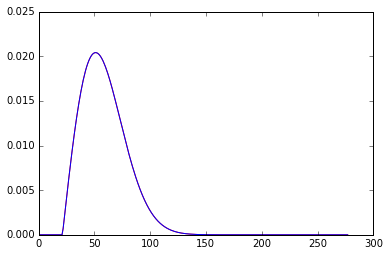

In [77]:
plot(pdf_fitted_wk6,'r-')
plot(pdf_fitted_wk16,'b-')

** Below the same analysis as above, on the updated, weighted files [2016-07-04] **

In [202]:
data2 = open('../data/DATA_genus_network_weighted_true.txt', 'rU').read()
datarr2 = np.array([i.split('\t') for i in data2.split('\n')[:-1]])

In [203]:
wk6_2 = [i for i in datarr2[1:] if i[1] == 'YI']
wk16_2 = [i for i in datarr2[1:] if i[1] == 'WT']
ymt_2 = [i for i in datarr2[1:] if i[1] == 'YM']
abx_2 = [i for i in datarr2[1:] if i[1] == 'ABX']
smt_2 = [i for i in datarr2[1:] if i[1] == 'SM']

(0, 0.2)

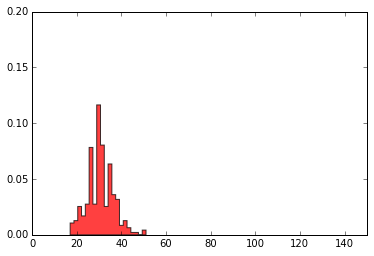

In [204]:
n, bins, patches = plt.hist([int(i[0]) for i in wk6_2], 20, normed=1, facecolor='r', alpha=0.75, histtype='stepfilled') 
plt.xlim(0,150)
plt.ylim(0,0.2)

(0, 0.2)

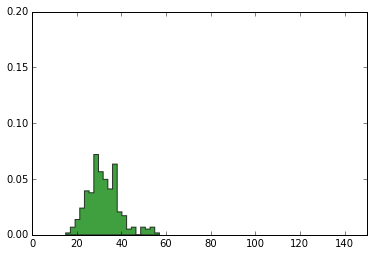

In [205]:
n, bins, patches = plt.hist([int(i[0]) for i in ymt_2], 20, normed=1, facecolor='g', alpha=0.75, histtype='stepfilled') 
plt.xlim(0,150)
plt.ylim(0,0.2)

(0, 0.2)

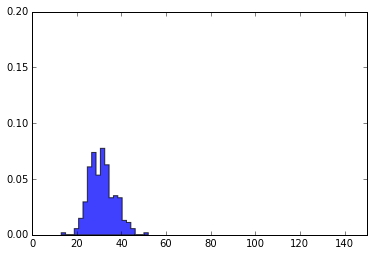

In [206]:
n, bins, patches = plt.hist([int(i[0]) for i in wk16_2], 20, normed=1, facecolor='b', alpha=0.75, histtype='stepfilled') 
plt.xlim(0,150)
plt.ylim(0,0.2)

(0, 0.2)

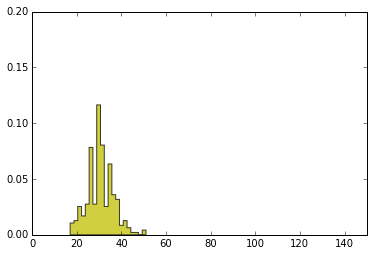

In [207]:
n, bins, patches = plt.hist([int(i[0]) for i in abx_2], 20, normed=1, facecolor='y', alpha=0.75, histtype='stepfilled') 
plt.xlim(0,150)
plt.ylim(0,0.2)

(0, 0.2)

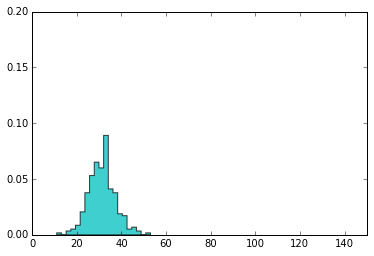

In [208]:
n, bins, patches = plt.hist([int(i[0]) for i in smt_2], 20, normed=1, facecolor='c', alpha=0.75, histtype='stepfilled') 
plt.xlim(0,150)
plt.ylim(0,0.2)

**July 5th 2016**  
New genus-level OTU network, filtered with a 0.05 cutoff

In [209]:
genus = open('../data/DATA_genus_network_weighted_true_p0.05.txt', 'rU').read()
genusarr = np.array([i.split('\t') for i in genus.split('\n')[:-1]])

In [210]:
wk6_g = [i for i in genusarr[1:] if i[1] == 'YI']
wk16_g = [i for i in genusarr[1:] if i[1] == 'WT']
ymt_g = [i for i in genusarr[1:] if i[1] == 'YM']
abx_g = [i for i in genusarr[1:] if i[1] == 'ABX']
smt_g = [i for i in genusarr[1:] if i[1] == 'SM']

(0, 0.2)

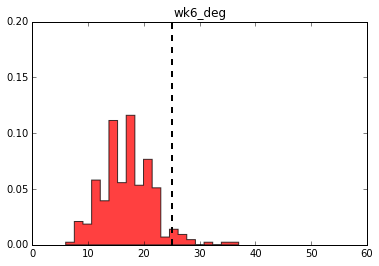

In [254]:
n, bins, patches = plt.hist([int(i[0]) for i in wk6_g], 20, normed=1, facecolor='r', alpha=0.75, histtype='stepfilled') 
title('wk6_deg')
#plt.axvline(np.percentile(np.array([int(i[0]) for i in wk6_g]), 90), color='k', linestyle='--', lw=2)
plt.axvline(np.percentile(np.array([int(i[0]) for i in wk6_g]), 95), color='k', linestyle='--', lw=2)
plt.xlim(0,60)
plt.ylim(0,0.2)

(0, 50)

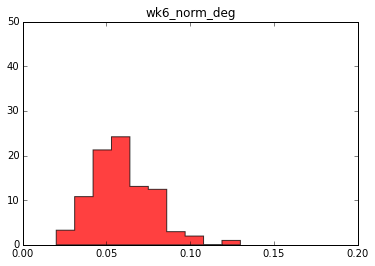

In [241]:
n, bins, patches = plt.hist([round(float(i[2]), 2) for i in wk6_g], 10, normed=1, facecolor='r', alpha=0.75, histtype='stepfilled') 
title('wk6_norm_deg')
plt.xlim(0,0.2)
plt.ylim(0,50)

(0, 0.2)

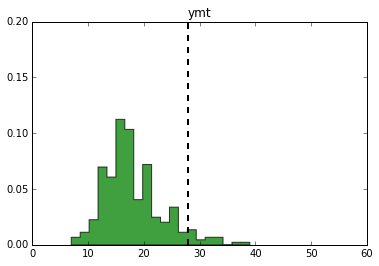

In [255]:
n, bins, patches = plt.hist([int(i[0]) for i in ymt_g], 20, normed=1, facecolor='g', alpha=0.75, histtype='stepfilled') 
title('ymt')
plt.axvline(np.percentile(np.array([int(i[0]) for i in ymt_g]), 95), color='k', linestyle='--', lw=2)
plt.xlim(0,60)
plt.ylim(0,0.2)

(0, 50)

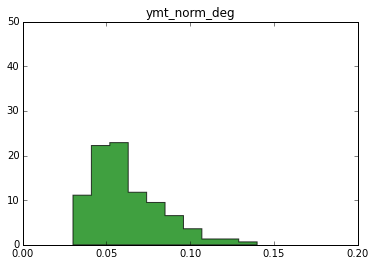

In [244]:
n, bins, patches = plt.hist([round(float(i[2]), 2) for i in ymt_g], 10, normed=1, facecolor='g', alpha=0.75, histtype='stepfilled') 
title('ymt_norm_deg')
plt.xlim(0,0.2)
plt.ylim(0,50)

(0, 0.2)

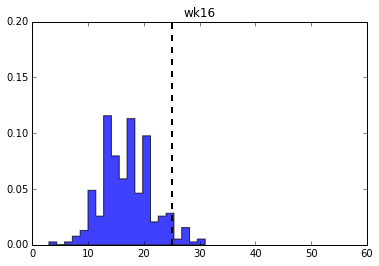

In [256]:
n, bins, patches = plt.hist([int(i[0]) for i in wk16_g], 20, normed=1, facecolor='b', alpha=0.75, histtype='stepfilled') 
plt.axvline(np.percentile(np.array([int(i[0]) for i in wk16_g]), 95), color='k', linestyle='--', lw=2)
title('wk16')
plt.xlim(0,60)
plt.ylim(0,0.2)

(0, 50)

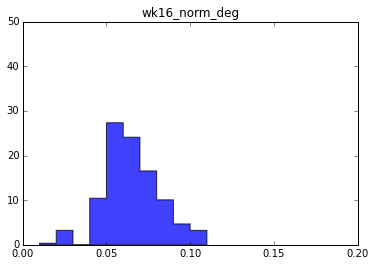

In [245]:
n, bins, patches = plt.hist([round(float(i[2]), 2) for i in wk16_g], 10, normed=1, facecolor='b', alpha=0.75, histtype='stepfilled') 
title('wk16_norm_deg')
plt.xlim(0,0.2)
plt.ylim(0,50)

(0, 0.2)

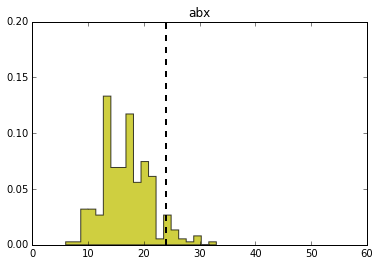

In [257]:
n, bins, patches = plt.hist([int(i[0]) for i in abx_g], 20, normed=1, facecolor='y', alpha=0.75, histtype='stepfilled') 
title('abx')
plt.axvline(np.percentile(np.array([int(i[0]) for i in abx_g]), 95), color='k', linestyle='--', lw=2)
plt.xlim(0,60)
plt.ylim(0,0.2)

(0, 50)

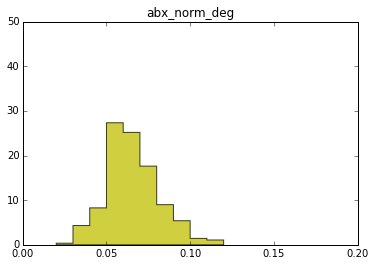

In [246]:
n, bins, patches = plt.hist([round(float(i[2]), 2) for i in abx_g], 10, normed=1, facecolor='y', alpha=0.75, histtype='stepfilled') 
title('abx_norm_deg')
plt.xlim(0,0.2)
plt.ylim(0,50)

(0, 0.2)

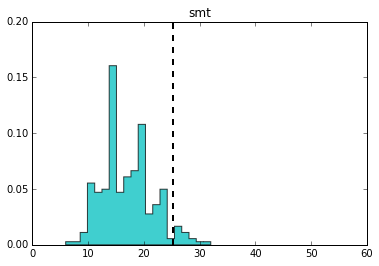

In [258]:
n, bins, patches = plt.hist([int(i[0]) for i in smt_g], 20, normed=1, facecolor='c', alpha=0.75, histtype='stepfilled') 
title('smt')
plt.axvline(np.percentile(np.array([int(i[0]) for i in smt_g]), 95), color='k', linestyle='--', lw=2)
plt.xlim(0,60)
plt.ylim(0,0.2)

(0, 50)

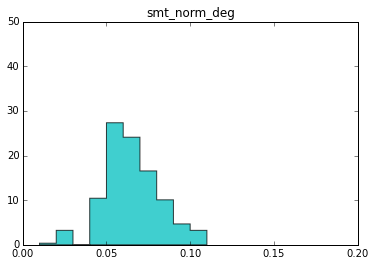

In [247]:
n, bins, patches = plt.hist([round(float(i[2]), 2) for i in wk16_g], 10, normed=1, facecolor='c', alpha=0.75, histtype='stepfilled') 
title('smt_norm_deg')
plt.xlim(0,0.2)
plt.ylim(0,50)

Below we save the genera that are within the 95th percentile for each experimental group, i.e. the most connected hubs

In [326]:
perc_wk6 = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in wk6_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in wk6_g]), 95)], key=lambda x:(int(x.split(' ')[-1])), reverse=True)
perc_ymt = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in ymt_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in ymt_g]), 95)], key=lambda x:(int(x.split(' ')[-1])), reverse=True)
perc_wk16 = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in wk16_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in wk16_g]), 95)], key=lambda x:(int(x.split(' ')[-1])), reverse=True)
perc_abx = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in abx_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in abx_g]), 95)], key=lambda x:(int(x.split(' ')[-1])), reverse=True)
perc_smt = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in smt_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in smt_g]), 95)], key=lambda x:(int(x.split(' ')[-1])), reverse=True)

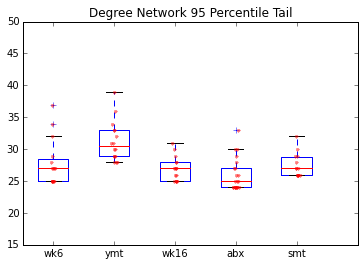

In [327]:
wk6_a = np.array([int(i.split(' ')[-1]) for i in perc_wk6])
ymt_a = np.array([int(i.split(' ')[-1]) for i in perc_ymt])
wk16_a = np.array([int(i.split(' ')[-1]) for i in perc_wk16])
abx_a = np.array([int(i.split(' ')[-1]) for i in perc_abx])
smt_a = np.array([int(i.split(' ')[-1]) for i in perc_smt])

data = [wk6_a, ymt_a, wk16_a, abx_a, smt_a]

plt.boxplot(data) # Or you can use the boxplot from Pandas
plt.ylim(15,50)
title('Degree Network 95 Percentile Tail')

plt.xticks([1, 2, 3, 4, 5, 6], ['wk6', 'ymt', 'wk16', 'abx', 'smt'])

for i in [1,2,3,4,5]:
    y = data[i-1]
    x = np.random.normal(i, 0.02, len(y))
    plt.plot(x, y, 'r.', alpha=0.5)

** 06-Jul-2016 **   
Below you can put whichever threshold you want for the percentile analysis

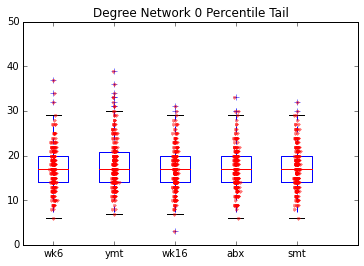

In [349]:
perc = 0

perc_wk6 = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in wk6_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in wk6_g]), perc)], key=lambda x:(int(x.split(' ')[-1])), reverse=True) 
perc_ymt = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in ymt_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in ymt_g]), perc)], key=lambda x:(int(x.split(' ')[-1])), reverse=True) 
perc_wk16 = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in wk16_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in wk16_g]), perc)], key=lambda x:(int(x.split(' ')[-1])), reverse=True) 
perc_abx = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in abx_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in abx_g]), perc)], key=lambda x:(int(x.split(' ')[-1])), reverse=True)
perc_smt = sorted([ ','.join(j[:-3:-1])+': '+j[0] for j in smt_g if int(j[0]) >= np.percentile(np.array([int(i[0]) for i in smt_g]), perc)], key=lambda x:(int(x.split(' ')[-1])), reverse=True)

wk6_a = np.array([int(i.split(' ')[-1]) for i in perc_wk6])
ymt_a = np.array([int(i.split(' ')[-1]) for i in perc_ymt])
wk16_a = np.array([int(i.split(' ')[-1]) for i in perc_wk16])
abx_a = np.array([int(i.split(' ')[-1]) for i in perc_abx])
smt_a = np.array([int(i.split(' ')[-1]) for i in perc_smt])

data = [wk6_a, ymt_a, wk16_a, abx_a, smt_a]

ttl = 'Degree Network %d Percentile Tail' % perc

plt.boxplot(data) # Or you can use the boxplot from Pandas
plt.ylim(0,50)
title(ttl)

plt.xticks([1, 2, 3, 4, 5, 6], ['wk6', 'ymt', 'wk16', 'abx', 'smt'])

for i in [1,2,3,4,5]:
    y = data[i-1]
    x = np.random.normal(i, 0.02, len(y))
    plt.plot(x, y, 'r.', alpha=0.5)

Do networks share similar hubs?

In [350]:
from sets import Set

In [368]:
wk6_key = [i.split(':')[0] for i in perc_wk6]
wk6_value = [i.split(':')[1][1:] for i in perc_wk6]
wk6_d = dict(zip(wk6_key, wk6_value))

ymt_key = [i.split(':')[0] for i in perc_ymt]
ymt_value = [i.split(':')[1][1:] for i in perc_ymt]
ymt_d = dict(zip(ymt_key, ymt_value))

wk16_key = [i.split(':')[0] for i in perc_wk16]
wk16_value = [i.split(':')[1][1:] for i in perc_wk16]
wk16_d = dict(zip(wk16_key, wk16_value))

abx_key = [i.split(':')[0] for i in perc_abx]
abx_value = [i.split(':')[1][1:] for i in perc_abx]
abx_d = dict(zip(abx_key, abx_value))

smt_key = [i.split(':')[0] for i in perc_smt]
smt_value = [i.split(':')[1][1:] for i in perc_smt]
smt_d = dict(zip(smt_key, smt_value))

In [375]:
wk6_ymt = Set(wk6_key) & Set(ymt_key)
wk6_smt = Set(wk6_key) & Set(smt_key)
wk6_wk16 = Set(wk6_key) & Set(wk16_key)
wk6_abx = Set(wk6_key) & Set(abx_key)
ymt_wk16 = Set(ymt_key) & Set(wk16_key)
ymt_abx = Set(ymt_key) & Set(abx_key)
ymt_smt = Set(ymt_key) & Set(smt_key)
wk16_abx = Set(wk16_key) & Set(abx_key)
wk16_smt = Set(wk16_key) & Set(smt_key)
smt_abx = Set(smt_key) & Set(abx_key)

In [384]:
# Arbitrary list of genera:
taxa = wk6_key

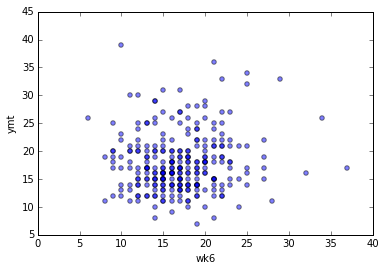

In [385]:
plt.scatter([int(wk6_d[i]) for i in taxa ], [int(ymt_d[i]) for i in taxa ], alpha=0.5)
plt.xlabel('wk6')
plt.ylabel('ymt')
plt.show()

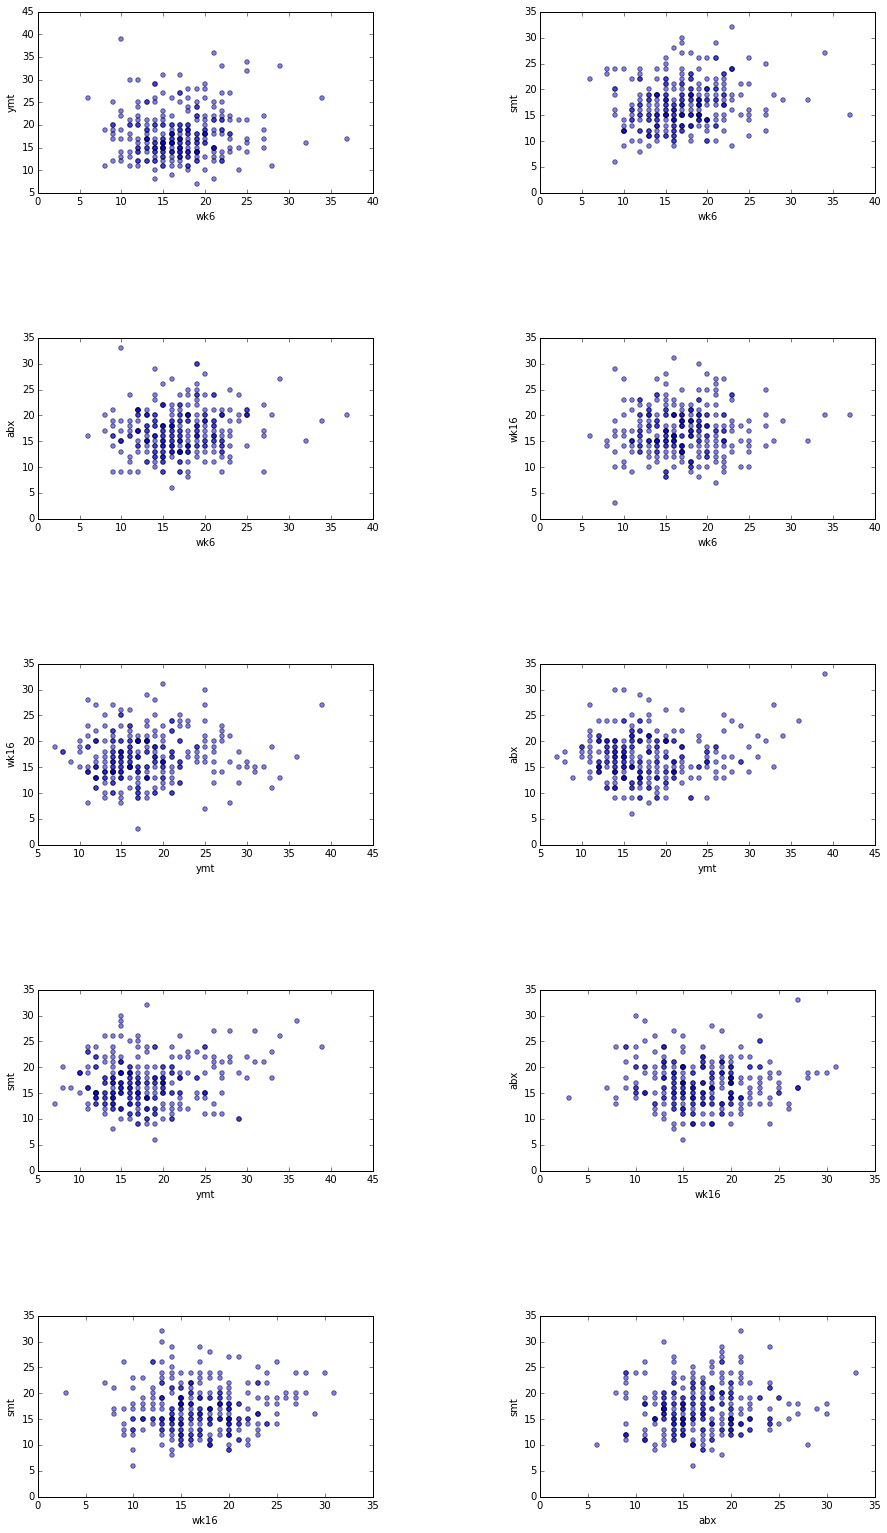

In [408]:
plt.figure(figsize=(15,15))

plt.subplot(5,2,1)
plt.scatter([int(wk6_d[i]) for i in taxa ], [int(ymt_d[i]) for i in taxa ], alpha=0.5)
plt.subplots_adjust(top=1.5, hspace=0.8, wspace=0.5)
plt.xlabel('wk6')
plt.ylabel('ymt')

plt.subplot(5,2,2)
plt.scatter([int(wk6_d[i]) for i in taxa ], [int(smt_d[i]) for i in taxa ], alpha=0.5)
plt.xlabel('wk6')
plt.ylabel('smt')

plt.subplot(5,2,3)
plt.scatter([int(wk6_d[i]) for i in taxa ], [int(abx_d[i]) for i in taxa ], alpha=0.5)
plt.xlabel('wk6')
plt.ylabel('abx')

plt.subplot(5,2,4)
plt.scatter([int(wk6_d[i]) for i in taxa ], [int(wk16_d[i]) for i in taxa ], alpha=0.5)
plt.xlabel('wk6')
plt.ylabel('wk16')

plt.subplot(5,2,5)
plt.scatter([int(ymt_d[i]) for i in taxa ], [int(wk16_d[i]) for i in taxa ], alpha=0.5)
plt.xlabel('ymt')
plt.ylabel('wk16')

plt.subplot(5,2,6)
plt.scatter([int(ymt_d[i]) for i in taxa ], [int(abx_d[i]) for i in taxa ], alpha=0.5)
plt.xlabel('ymt')
plt.ylabel('abx')

plt.subplot(5,2,7)
plt.scatter([int(ymt_d[i]) for i in taxa ], [int(smt_d[i]) for i in taxa ], alpha=0.5)
plt.xlabel('ymt')
plt.ylabel('smt')

plt.subplot(5,2,8)
plt.scatter([int(wk16_d[i]) for i in taxa ], [int(abx_d[i]) for i in taxa ], alpha=0.5)
plt.xlabel('wk16')
plt.ylabel('abx')

plt.subplot(5,2,9)
plt.scatter([int(wk16_d[i]) for i in taxa ], [int(smt_d[i]) for i in taxa ], alpha=0.5)
plt.xlabel('wk16')
plt.ylabel('smt')

plt.subplot(5,2,10)
plt.scatter([int(abx_d[i]) for i in taxa ], [int(smt_d[i]) for i in taxa ], alpha=0.5)
plt.xlabel('abx')
plt.ylabel('smt')

plt.show()